__ELON MUSK TWEET ANALYSIS__

The objective of this project is to perform word frequency analysis. This link provides Twitter data of Elon Musk from 2010-2022. For analysis consider the years 2017-2022 (last 6 complete years). Each year has thousands of tweets. Assume each year to be a document (all the tweets in one year will be considered as a document)

1. Compute the term frequencies for each year. They should be normalized (scale of [0, 1]).
2. Exclude stopwords.
3. Show the top 10 words (for each year) by highest value of word frequency.
4. Plot a histogram of word frequencies for each year
5. Demonstrate Zipf’s law by plotting log-log plots of word frequencies v. rank for each year 6. 
6. Use TF-IDF to calculate and show the 5 most “important” words for each y

https://www.kaggle.com/datasets/ayhmrba/elon-musk-tweets-2010-2021?resource=download&select=2017.csv

__DATASET__

About Dataset

Elon Musk Tweets (2010 - 2021) All Elon Musk Twitter Tweets, from 2010 to March 22, 2021. 23/3/2021 Elon Reeve Musk FRS is a business magnate, industrial designer, and engineer. He is the founder, CEO, CTO, and chief designer of SpaceX; early investor, CEO, and product architect of Tesla, Inc.; founder of The Boring Company; co-founder of Neuralink; and co-founder and initial co-chairman of OpenAI. - Wikipedia Although Elon joined twitter in 2009, he didn't start tweeting until 2010 - or prior tweets were deleted.



__COLUMN DESCRIPTION:__

        `id: ID of tweet`.
        conversation_id:: ID of twitter conversation/thread.
        created_at: Unknown, some kind of time/location index from twitter. (?)
        `date: Date of Creation`.
        timezone: Timezone.
        place: Location.
        `tweet: Contents of tweet, tweet body.`
        `language: Language of tweet.`
        hashtags: Hashtags in the tweet "#".
        cashtags: Cashtags in the tweet "$", often used for stock tweets.
        `user_id: ID of the tweet/reply author.`
        `user_id_str: User ID but in string format.`
        `username: Username of the tweet/reply author.`
         name: Name of tweet/reply author.
        day: Day of the week in which the tweet was published.
        hour: Hour of the day in which the tweet was published.
        link: Link to the tweet.
        urls: Urls present in the tweet.
        photos: Photos in the tweet (as links).
        video: videos in the tweet (Yes/No).
        thumbnail: Thumbnail for the image present in the tweet (if applicable, otherwise null).
        `retweet: Is this a retweet? (Yes/No).`
        nlikes: Number of likes on the tweet.
        nreplies: Number of replies to the tweet.
        nretweets: Number of times the tweet was retweeted.
        quote_url: Url of quoted tweet, if applicable.
        search: Unknown.
        near: Additional location info, null.
        geo: Additional location info, null.
        source: Unknown, null.
        user_rt_id: Possibly the id of the tweet author if it's a retweet, null.
        user_rt: Possibly the username of the tweet author if it's a retweet, null.
        retweet_id: Id of the retweet, null.
        reply_to: Info about the original tweet if this datapoint is a reply.
        retweet_date: Date of retweet, null.
        translate, trans_src, trans_dest Are columns that have to do with the google translate api, which was not used, therefore these columns are all null.
        translate, trans_src, trans_dest Are columns that have to do with the google translate api, which was not used, therefore these columns are all null.


# Downloading all necessary modules and completing the pre-work

In [1]:
! pip install WordCloud

In [2]:
!pip install emoji

In [3]:
!pip install spacymoji

In [4]:
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from html import unescape


In [5]:
# import all the basic libraries
import pandas as pd
import numpy as np
import math
import os

# visualization libraries
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import glob
from pylab import *

# model libraries
import re
import nltk
from nltk.corpus import stopwords

# stopwords import from nltk package
nltk.download('stopwords')
from nltk.corpus import stopwords

# string package processes the punctuation in sentences
import string

# avoid warnings
import warnings

from sklearn.preprocessing import MinMaxScaler



import emoji

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# read data from year 2017-2022
df2017 = pd.read_csv("/Users/aishwarya/Documents/Spring'24/Elon musk data/2017.csv")
df2018 = pd.read_csv("/Users/aishwarya/Documents/Spring'24/Elon musk data/2018.csv")
df2019 = pd.read_csv("/Users/aishwarya/Documents/Spring'24/Elon musk data/2019.csv")
df2020 = pd.read_csv("/Users/aishwarya/Documents/Spring'24/Elon musk data/2020.csv")
df2021 = pd.read_csv("/Users/aishwarya/Documents/Spring'24/Elon musk data/2021.csv")
df2022 = pd.read_csv("/Users/aishwarya/Documents/Spring'24/Elon musk data/2022.csv")


# Data Preprocessing

In [7]:
# Understand and process data

In [8]:
df2017.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,945814723521417217,945712432416137217,1.514335e+12,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN
1,1,945749747129659392,945712432416137217,1.514319e+12,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN
2,2,945748731197980672,945712432416137217,1.514319e+12,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN
3,3,945730195113365504,945727773493968896,1.514315e+12,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN
4,4,945729852874694656,945712432416137217,1.514315e+12,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN


In [9]:
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167 entries, 0 to 3166
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3167 non-null   int64  
 1   id               3167 non-null   int64  
 2   conversation_id  3167 non-null   int64  
 3   created_at       3167 non-null   float64
 4   date             3167 non-null   object 
 5   timezone         3167 non-null   int64  
 6   place            0 non-null      float64
 7   tweet            3167 non-null   object 
 8   language         3167 non-null   object 
 9   hashtags         3167 non-null   object 
 10  cashtags         3167 non-null   object 
 11  user_id          3167 non-null   int64  
 12  user_id_str      3167 non-null   int64  
 13  username         3167 non-null   object 
 14  name             3167 non-null   object 
 15  day              3167 non-null   int64  
 16  hour             3167 non-null   int64  
 17  link          

In [10]:
df2017.describe()

,Unnamed: 0,id,conversation_id,created_at,timezone,place,user_id,user_id_str,day,hour,...,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src,trans_dest
count,3167.000000,3.167000e+03,3.167000e+03,3.167000e+03,3167.0,0.0,3167.0,3167.0,3167.000000,3167.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1583.000000,6.590143e+17,6.587789e+17,1.445952e+12,0.0,NaN,44196397.0,44196397.0,4.233344,12.504263,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,914.378477,2.379594e+17,2.378503e+17,5.674593e+10,0.0,NaN,0.0,0.0,1.954356,7.701672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.543473e+10,1.543473e+10,1.275676e+12,0.0,NaN,44196397.0,44196397.0,1.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,791.500000,4.572019e+17,4.572013e+17,1.397840e+12,0.0,NaN,44196397.0,44196397.0,3.000000,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1583.000000,7.430977e+17,7.430971e+17,1.466003e+12,0.0,NaN,44196397.0,44196397.0,4.000000,15.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2374.500000,8.622148e+17,8.621445e+17,1.494403e+12,0.0,NaN,44196397.0,44196397.0,6.000000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3166.000000,9.458147e+17,9.457278e+17,1.514335e+12,0.0,NaN,44196397.0,44196397.0,7.000000,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# check they are all from Musk's twitter account
# username: Username of the tweet/reply author.
print("num of username: ", len(unique(df2017["username"])), unique(df2017["username"]))
# name: Name of tweet/reply author.
print("num of name: ", len(unique(df2017["name"])), unique(df2017["name"]))
# id: ID of tweet. 
print("num of ID/tweet: ", len(unique(df2017["id"])))

num of username:  1 ['elonmusk']
num of name:  1 ['Elon Musk']
num of ID/tweet:  3167


In [12]:
# here we are checking the length of the dataset and also all the unique years in the dataset
print("df2017:", len(df2017), unique(pd.to_datetime(df2017["date"]).dt.year))
print("df2018:", len(df2018), unique(pd.to_datetime(df2018["date"]).dt.year))
print("df2019:", len(df2019), unique(pd.to_datetime(df2019["date"]).dt.year))
print("df2020:", len(df2020), unique(pd.to_datetime(df2020["date"]).dt.year))
print("df2021:", len(df2021), unique(pd.to_datetime(df2021["date"]).dt.year))
print("df2022:", len(df2022), unique(pd.to_datetime(df2021["date"]).dt.year))


df2017: 3167 [2010 2011 2012 2013 2014 2015 2016 2017]
df2018: 2285 [2018]
df2019: 8312 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
df2020: 11717 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
df2021: 3115 [2021]
df2022: 1028 [2021]


In [13]:
# concat all the datasets into one
df = pd.concat([df2017, df2018, df2019, df2020, df2021, df2022])

In [14]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,reply_to,retweet_date,translate,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,"[{'screen_name': 'neilsiegel', 'name': 'Neil S...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,"[{'screen_name': 'Kreative', 'name': 'Leslie',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,945748731197980672,945712432416137217,1514319043000.0,2017-12-26 20:10:43,0,NaN,@dd_hogan Ok,und,[],...,"[{'screen_name': 'dd_hogan', 'name': 'Live4EVD...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,"[{'screen_name': 'Jason', 'name': 'jason@calac...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,"[{'screen_name': 'kabirakhtar', 'name': 'kabir...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29624 entries, 0 to 1027
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       25481 non-null  float64
 1   id               29624 non-null  int64  
 2   conversation_id  29624 non-null  int64  
 3   created_at       29624 non-null  object 
 4   date             29624 non-null  object 
 5   timezone         29624 non-null  int64  
 6   place            0 non-null      float64
 7   tweet            29624 non-null  object 
 8   language         29624 non-null  object 
 9   hashtags         29624 non-null  object 
 10  cashtags         29624 non-null  object 
 11  user_id          29624 non-null  int64  
 12  user_id_str      25481 non-null  float64
 13  username         29624 non-null  object 
 14  name             29624 non-null  object 
 15  day              25481 non-null  float64
 16  hour             25481 non-null  float64
 17  link         

In [16]:
# convert Date into "Datetime" format
df["date"] = pd.to_datetime(df["date"])
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'time', 'mentions',
       'replies_count', 'retweets_count', 'likes_count'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29624 entries, 0 to 1027
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       25481 non-null  float64       
 1   id               29624 non-null  int64         
 2   conversation_id  29624 non-null  int64         
 3   created_at       29624 non-null  object        
 4   date             29624 non-null  datetime64[ns]
 5   timezone         29624 non-null  int64         
 6   place            0 non-null      float64       
 7   tweet            29624 non-null  object        
 8   language         29624 non-null  object        
 9   hashtags         29624 non-null  object        
 10  cashtags         29624 non-null  object        
 11  user_id          29624 non-null  int64         
 12  user_id_str      25481 non-null  float64       
 13  username         29624 non-null  object        
 14  name             29624 non-null  object

In [18]:
print("df:", len(df), len(unique(df["id"])), unique(df["date"].dt.year))

df: 29624 15346 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [19]:
#we need to remove duplicates:
df = df.drop_duplicates(subset=['id'])
print("df:", len(df), len(unique(df["id"])), unique(df["date"].dt.year))

df: 15346 15346 [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]


In [20]:
# then we filter 6 years we want to work with
df = df.loc[(df["date"].dt.year >= 2017) & (df["date"].dt.year <= 2022)]
print("df:", len(df), unique(df["date"].dt.year))


df: 13340 [2017 2018 2019 2020 2021 2022]


In [21]:
# Lists all the languages used
unique(df.language)
df.groupby(["language"])["language"].agg("count").sort_values(ascending=False)


language
en     11444
und     1456
tl       133
de        42
fr        42
es        33
in        26
ru        15
pt        12
it        12
pl        11
nl        11
tr        10
ca        10
et        10
da         9
lt         8
cy         6
no         5
hi         5
ro         5
ht         4
is         4
eu         3
sv         3
hu         3
sl         3
ja         3
vi         2
lv         2
fi         2
cs         2
sr         1
el         1
uk         1
ar         1
Name: language, dtype: int64

In [22]:
# Filters out English language
print(len(df))
df = df[df["language"]=="en"]
print(len(df))
df.columns

13340
11444


Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'time', 'mentions',
       'replies_count', 'retweets_count', 'likes_count'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11444 entries, 0 to 511
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       8488 non-null   float64       
 1   id               11444 non-null  int64         
 2   conversation_id  11444 non-null  int64         
 3   created_at       11444 non-null  object        
 4   date             11444 non-null  datetime64[ns]
 5   timezone         11444 non-null  int64         
 6   place            0 non-null      float64       
 7   tweet            11444 non-null  object        
 8   language         11444 non-null  object        
 9   hashtags         11444 non-null  object        
 10  cashtags         11444 non-null  object        
 11  user_id          11444 non-null  int64         
 12  user_id_str      8488 non-null   float64       
 13  username         11444 non-null  object        
 14  name             11444 non-null  object 

In [24]:
# creating new columns called "year","month","DAY" from the date column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month


In [25]:
df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest', 'time', 'mentions',
       'replies_count', 'retweets_count', 'likes_count', 'year', 'month'],
      dtype='object')

In [26]:
df['DAY']= df.date.dt.day

In [27]:
df.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count,year,month,DAY
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,27
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
5,5.0,945729229001334784,945712432416137217,1514314393000.0,2017-12-26 18:53:13,0,NaN,@sustainableanna @VanSeedBank Similar total si...,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26


In [28]:
df_clean = df.copy() # copy of the main dataset
df_clean.head()

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count,year,month,DAY
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,@neilsiegel @Tesla Coming very soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,27
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,@Kreative Vastly better maps/nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,@Jason @Tesla Sure,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,"@kabirakhtar Yeah, it’s terrible. Had to upgra...",en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
5,5.0,945729229001334784,945712432416137217,1514314393000.0,2017-12-26 18:53:13,0,NaN,@sustainableanna @VanSeedBank Similar total si...,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26


# Removing Stopwords and lemmatizing the data

In [29]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
import nltk
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/aishwarya/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
# Initialize WordNet Lemmatizer and get English stopwords
lemmatizer = WordNetLemmatizer()
myStopWords = list(set(stopwords.words('english')))

# Select the column name for tweets
col = "tweet"

# Convert text to lowercase
df_clean[col] = df_clean[col].apply(lambda inp: str(inp).lower())

# Remove HTML entities using BeautifulSoup
df_clean[col] = df_clean[col].apply(lambda inp: BeautifulSoup(unescape(inp), 'lxml').text)

# Split text into words using regular expression, removing non-word characters
df_clean[col] = df_clean[col].apply(lambda inp: " ".join(re.split(r'\W+', str(inp))))

# Remove extra whitespaces
df_clean[col] = df_clean[col].apply(lambda inp: " ".join(inp.split()))

df_clean[col] = df_clean[col].apply(lambda inp: "".join(lemmatizer.lemmatize(inp)))

# Remove stopwords
df_clean[col] = df_clean[col].apply(lambda inp: " ".join(word for word in inp.split() if word not in myStopWords))

# Remove non-alphabetic characters
df_clean[col] = df_clean[col].apply(lambda inp: re.sub(r"[^a-zA-Z]", " ", str(inp)))

# Remove URLs
df_clean[col] = df_clean[col].apply(lambda inp: re.sub("https*\S+", " ", str(inp)))

# Remove hashtags
df_clean[col] = df_clean[col].apply(lambda inp: re.sub("#\S+", " ", str(inp)))

# Remove words containing apostrophes followed by alphanumeric characters
df_clean[col] = df_clean[col].apply(lambda inp: re.sub("\'\w+", '', str(inp)))

# Remove punctuation
df_clean[col] = df_clean[col].apply(lambda inp: re.sub('[%s]' % re.escape(string.punctuation), ' ', str(inp)))

# Remove words containing alphanumeric characters
df_clean[col] = df_clean[col].apply(lambda inp: re.sub(r'\w*\d+\w*', '', str(inp)))

# Remove extra whitespaces again
df_clean[col] = df_clean[col].apply(lambda inp: re.sub('\s{2,}', " ", str(inp)))

# Display the cleaned dataframe
df_clean.head()


,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,trans_src,trans_dest,time,mentions,replies_count,retweets_count,likes_count,year,month,DAY
0,0.0,945814723521417217,945712432416137217,1514334777000.0,2017-12-27 00:32:57,0,NaN,neilsiegel tesla coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,27
1,1.0,945749747129659392,945712432416137217,1514319285000.0,2017-12-26 20:14:45,0,NaN,kreative vastly better maps nav coming soon,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
3,3.0,945730195113365504,945727773493968896,1514314623000.0,2017-12-26 18:57:03,0,NaN,jason tesla sure,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
4,4.0,945729852874694656,945712432416137217,1514314542000.0,2017-12-26 18:55:42,0,NaN,kabirakhtar yeah terrible upgrade old linux os...,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26
5,5.0,945729229001334784,945712432416137217,1514314393000.0,2017-12-26 18:53:13,0,NaN,sustainableanna vanseedbank similar total size...,en,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,12,26


In [32]:
# generate the tweet year wise text words count for each year
df_clean[col+"_count"] = df_clean[col].apply(lambda inp: len(inp.split()))
temp_tweet_count = df_clean.groupby(["year"]).sum()["tweet_count"]
temp_tweet_count

year
2017    10031
2018    22426
2019    24326
2020    27540
2021    23848
2022     3240
Name: tweet_count, dtype: int64

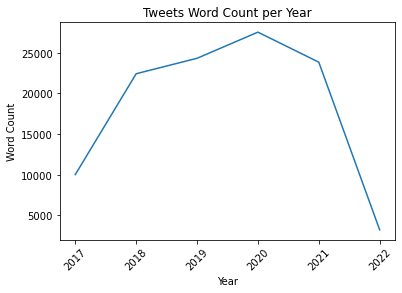

In [33]:
# Set the title of the plot
plt.title(f"Tweets Word Count per Year")

# Plot the data (temp_tweet_count)
plt.plot(temp_tweet_count)
plt.xticks(rotation=45)
# Set labels
plt.ylabel("Word Count")
plt.xlabel("Year")

# Display the plot
plt.show()


In [34]:
# generate the tweet year wise text words count for each year
# build the counter and keywords for their each individual frequencies
from collections import Counter

yrs, texts, counters = [], [], []
keywords, frequencies = [], []

for yr in range(2017, 2023):
    temp = df_clean[df_clean["year"] == yr]
    out = ' '.join(temp["tweet"])
    yrs.append(yr)
    texts.append(out)
    words = out.split()
    ctr = dict(Counter(words))
    keywords.append(list(ctr.keys()))
    frequencies.append(list(ctr.values()))
    ctr = sorted(ctr.items(), key=lambda x: x[1], reverse=True)
    counters.append(ctr)
    
yearly_words_data = pd.DataFrame({'years': yrs, "text": texts, "counter": counters, "keywords":keywords, "frequencies": frequencies})
yearly_words_data

,years,text,counter,keywords,frequencies
0,2017,neilsiegel tesla coming soon kreative vastly b...,"[(co, 220), (tesla, 80), (model, 58), (good, 5...","[neilsiegel, tesla, coming, soon, kreative, va...","[1, 80, 26, 32, 1, 4, 25, 1, 2, 1, 24, 1, 39, ..."
1,2018,ben vincent thanks tesla owners china looking ...,"[(tesla, 439), (co, 276), (car, 121), (model, ...","[ben, vincent, thanks, tesla, owners, china, l...","[1, 16, 49, 439, 32, 18, 9, 10, 1, 50, 1, 5, 1..."
2,2019,joe wakefield austinbarnard tjq tyger cyber fa...,"[(tesla, 568), (co, 307), (erdayastronaut, 240...","[joe, wakefield, austinbarnard, tjq, tyger, cy...","[10, 4, 25, 7, 7, 7, 7, 7, 19, 3, 2, 4, 2, 1, ..."
3,2020,entertainment critical cars drive kimpaquette ...,"[(tesla, 338), (co, 279), (erdayastronaut, 229...","[entertainment, critical, cars, drive, kimpaqu...","[3, 15, 27, 10, 2, 5, 2, 1, 1, 3, 28, 35, 338,..."
4,2021,csmithson heydave blkmdl mims chart big deal b...,"[(tesla, 347), (spacex, 231), (co, 200), (whol...","[csmithson, heydave, blkmdl, mims, chart, big,...","[1, 17, 21, 3, 3, 31, 7, 2, 1, 2, 17, 19, 1, 1..."
5,2022,spacepadreisle way free qa haha teslaownerssv ...,"[(tesla, 51), (wholemarsblog, 32), (spacex, 28...","[spacepadreisle, way, free, qa, haha, teslaown...","[5, 6, 3, 1, 4, 23, 3, 4, 9, 14, 5, 3, 1, 1, 1..."


# Top 10 word frequencies for each year

In [35]:
# Print the top 10 words frequency for each year 2017-2022

for yr in range(2017, 2023):
    data = yearly_words_data[yearly_words_data["years"] == yr]["counter"].values[0]

    names, values = [], [] 
    
    print(f"TOP 10 KEYWORD FREQUENCES FOR EACH KEYWORD FOR YEAR {yr}:")
    for i in range(10):
        names.append(data[i][0])
        values.append(data[i][1])
        print(f"Keyword: {data[i][0]}, frequencies: {data[i][1]}")
    print()

TOP 10 KEYWORD FREQUENCES FOR EACH KEYWORD FOR YEAR 2017:
Keyword: co, frequencies: 220
Keyword: tesla, frequencies: 80
Keyword: model, frequencies: 58
Keyword: good, frequencies: 53
Keyword: spacex, frequencies: 53
Keyword: like, frequencies: 49
Keyword: one, frequencies: 46
Keyword: first, frequencies: 43
Keyword: next, frequencies: 43
Keyword: yeah, frequencies: 39

TOP 10 KEYWORD FREQUENCES FOR EACH KEYWORD FOR YEAR 2018:
Keyword: tesla, frequencies: 439
Keyword: co, frequencies: 276
Keyword: car, frequencies: 121
Keyword: model, frequencies: 118
Keyword: good, frequencies: 103
Keyword: like, frequencies: 95
Keyword: spacex, frequencies: 79
Keyword: would, frequencies: 77
Keyword: people, frequencies: 74
Keyword: even, frequencies: 65

TOP 10 KEYWORD FREQUENCES FOR EACH KEYWORD FOR YEAR 2019:
Keyword: tesla, frequencies: 568
Keyword: co, frequencies: 307
Keyword: erdayastronaut, frequencies: 240
Keyword: spacex, frequencies: 197
Keyword: flcnhvy, frequencies: 159
Keyword: would, fr

# Bar plot for the top 10 word frequency starting from 2017-2022

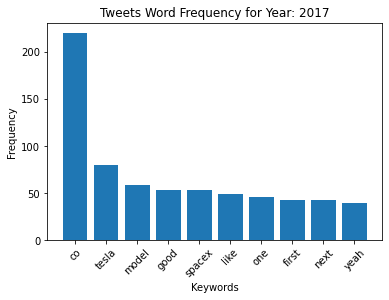

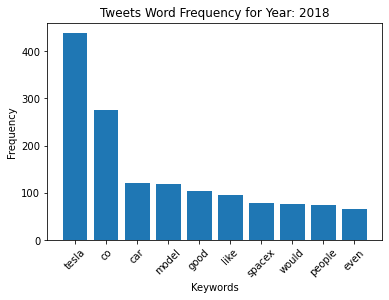

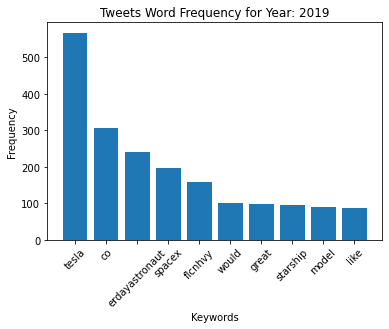

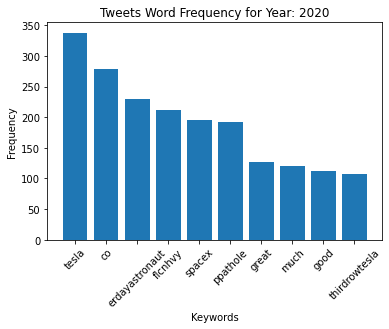

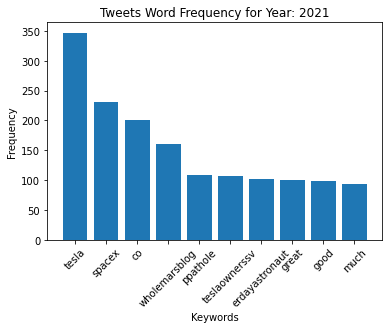

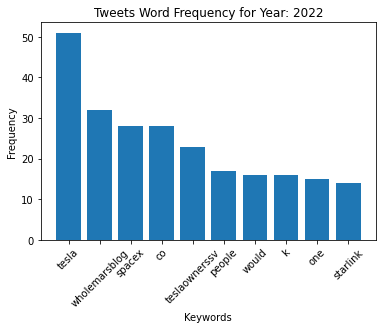

In [36]:
for yr in range(2017, 2023):
    data = yearly_words_data[yearly_words_data["years"] == yr]["counter"].values[0]

    names, values = [], [] 
    
    for i in range(10):
        names.append(data[i][0])
        values.append(data[i][1])
        
    plt.title(f"Tweets Word Frequency for Year: {yr}")
    plt.bar(range(len(names)), values, tick_label=names)
    plt.xticks(rotation = 45)
    plt.ylabel("Frequency")
    plt.xlabel("Keywords")
    plt.show()

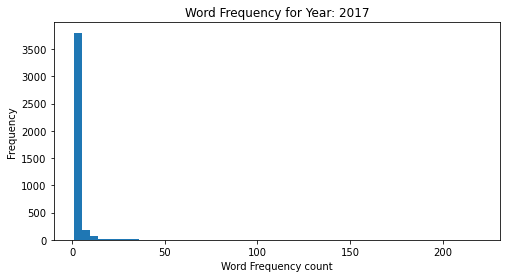

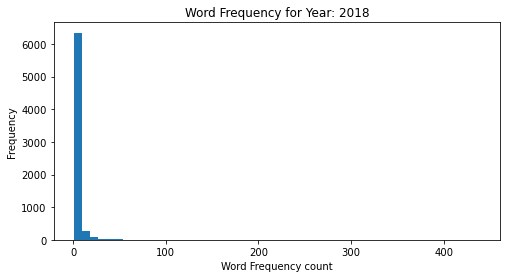

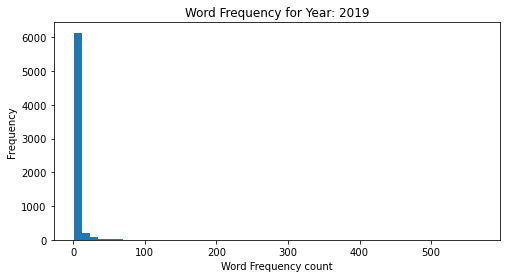

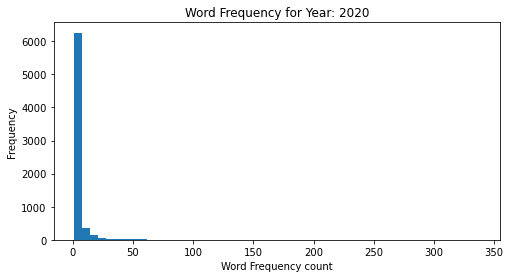

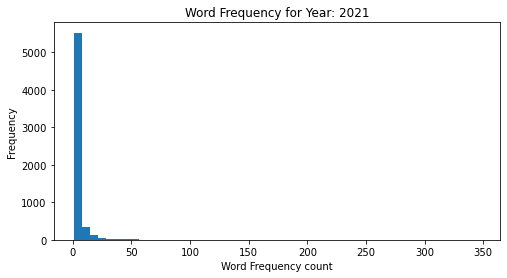

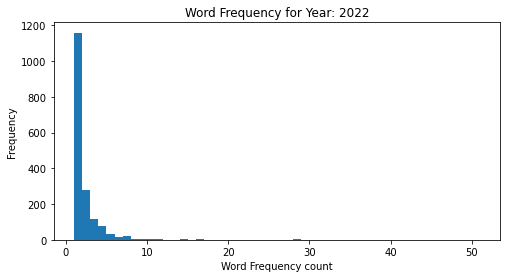

In [37]:
# histogram of word frequencies for each year from 2017-2022

for yr in range(2017, 2023):
    data = yearly_words_data[yearly_words_data["years"] == yr]["counter"].values[0]
    values = [] 
    
    for i in range(len(data)):
        values.append(data[i][1])
        
    plt.figure(figsize=(8, 4))
    plt.title(f"Word Frequency for Year: {yr}")
    plt.hist(values, bins=50)
    plt.ylabel("Frequency")
    plt.xlabel("Word Frequency count")
    plt.show()

# Zipf's Law

In [38]:
# Zipf's Law

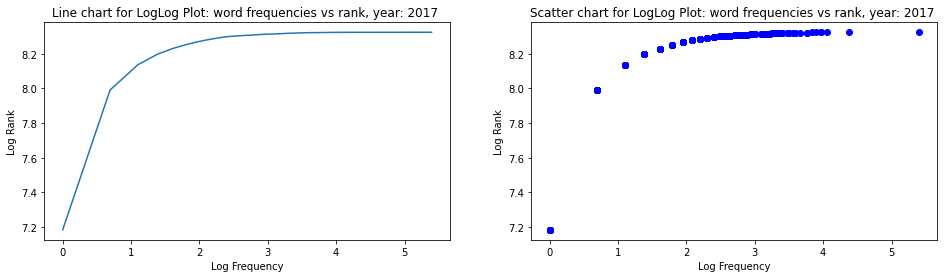

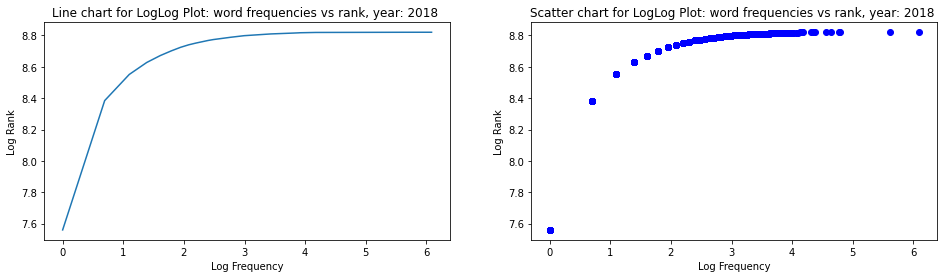

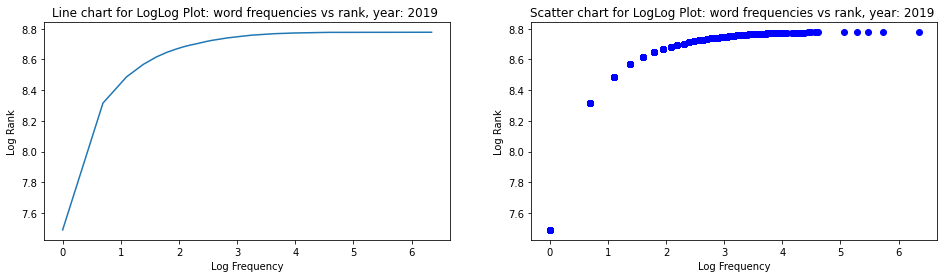

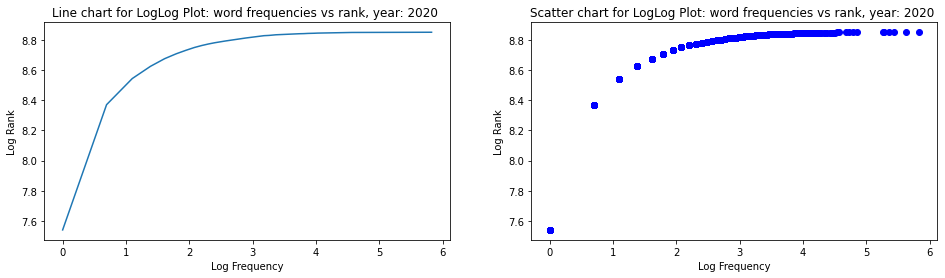

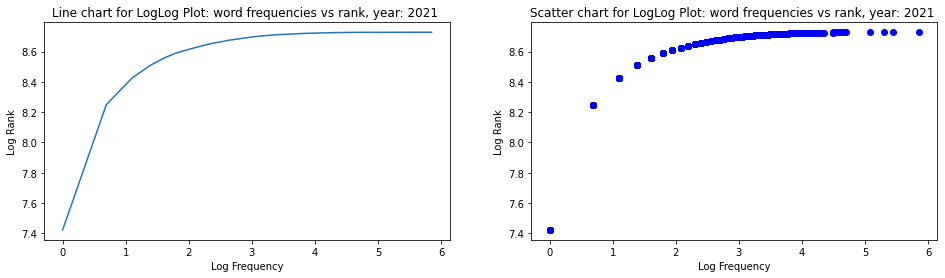

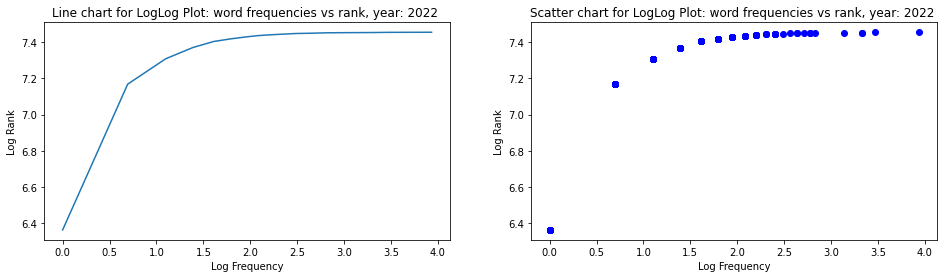

In [39]:
import scipy.stats as ss

# for each year calculate the frequency and rank of the words and 
# generate the loglog plot for each year
for yr in range(2017, 2023):
    yr_data = yearly_words_data[yearly_words_data["years"] == yr]["frequencies"].values[0]
    rank_word = ss.rankdata([freq for freq in yr_data])
    freq = sorted([math.log(freq) for freq in yr_data])
    rank = sorted([math.log(rank) for rank in rank_word])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
    ax1.plot(freq, rank)
    ax2.plot(freq, rank, 'bo')
    
    ax1.set_title(f"Line chart for LogLog Plot: word frequencies vs rank, year: {yr} ")
    ax2.set_title(f"Scatter chart for LogLog Plot: word frequencies vs rank, year: {yr} ")
    
    ax1.set_ylabel("Log Rank")
    ax1.set_xlabel("Log Frequency")
    
    ax2.set_ylabel("Log Rank")
    ax2.set_xlabel("Log Frequency")
    
    plt.show()

# Frequency distribution of words using Bigram network

In [40]:
import networkx as nx

# the following function builds the bigram network 
# by generating the biwords and building the frequency distribution
# then further generating the graph of with the weighted edges 
# for each node as the keywords
def build_bigram_network(keywords, year):
    bigram_all_words = list(nltk.bigrams(keywords))
    bigram_words_analysis = nltk.FreqDist(bigram_all_words)
    
    G = nx.Graph()
    for index, row in bigram_words_analysis.most_common(100):
        G.add_weighted_edges_from([(index[0], index[1], row)])  
    
    plt.figure(figsize=(10, 10))
    plt.title(f"Bigram Network plot for Year: {year}\n(for top 100 common bigram pairs)", size=15)
    nx.draw(G, pos=nx.spring_layout(G, k=0.25, iterations=10), with_labels=True)
    ax = plt.gca()
    plt.show()
    

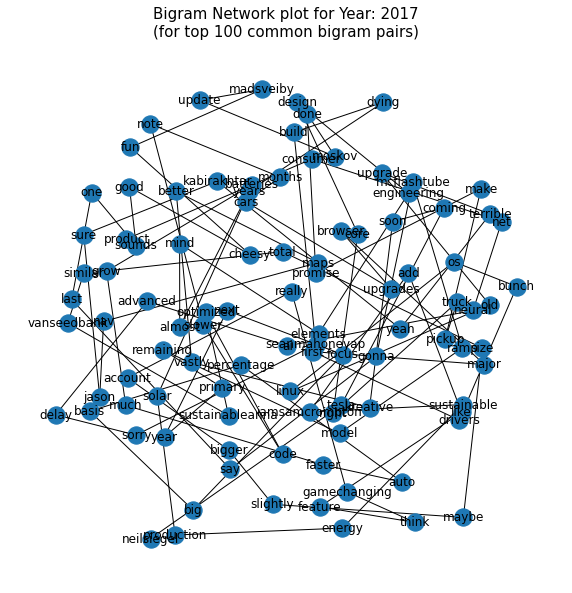

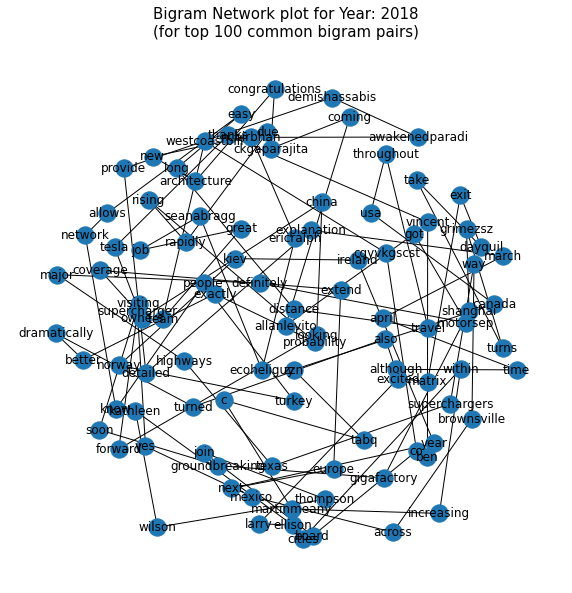

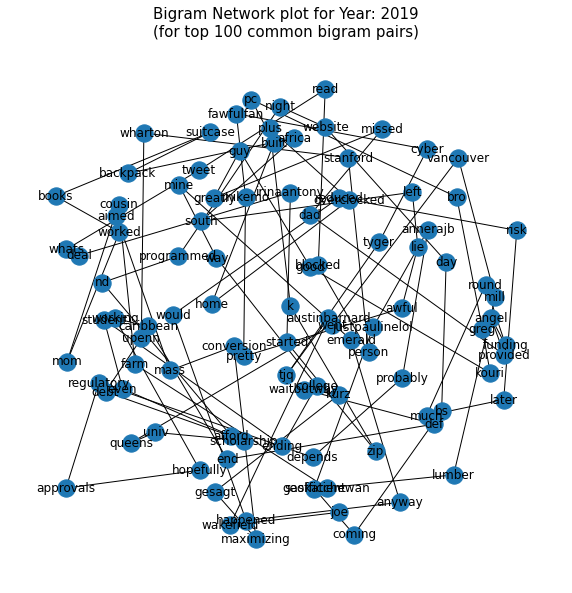

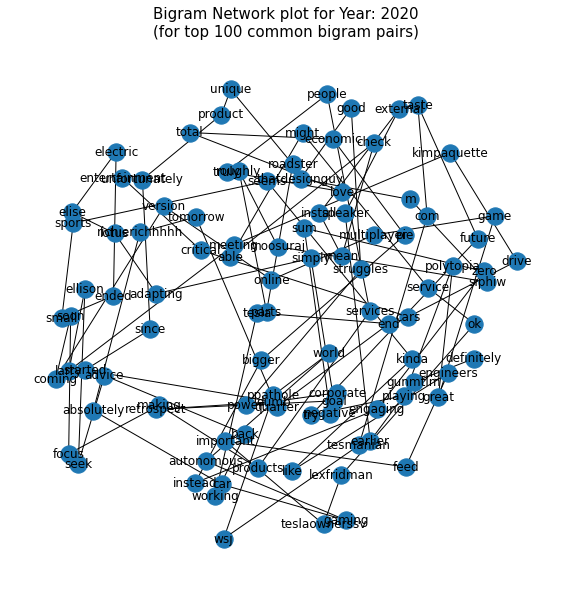

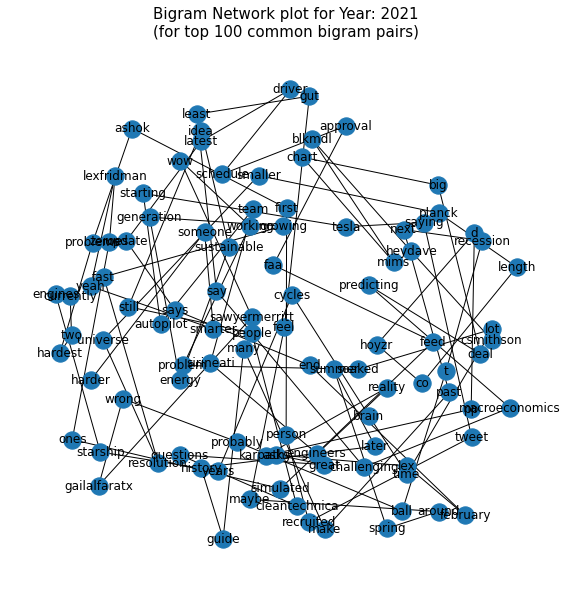

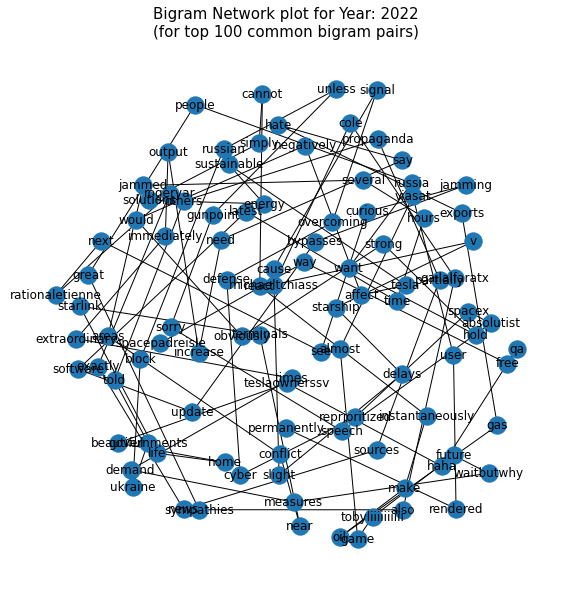

In [41]:
# plotting the bigram for each network for each year 2017-2022
for yr in range(2017, 2023):
    keywords = yearly_words_data[yearly_words_data["years"] == yr]["keywords"].values[0]
    build_bigram_network(keywords, yr)

# Term Frequencies 

In [42]:
# Compute Term Frequencies for each year
# they should first be normalized and the stopwords must be excluded as well

In [43]:
df['year'].unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [44]:
# excluding a few stopwords
stop_words = set(stopwords.words('english'))
stop_words.add("it’s")
stop_words.add("would")

def compute_tf(df, year):
    # filter the dataframe to select tweets from the given year
    year_df = df[df['year'] == year]
    
    # concatenate all tweets into a single string
    tweets = ' '.join(year_df['tweet'].tolist())
    
    # split the string into words and remove stopwords
    words = [word for word in tweets.lower().split() if word not in stop_words]
    
    # Remove punctuation marks at the start and end of each string in the list
    words = [s.strip(string.punctuation) for s in words]
   
    # compute the frequency of each word
    word_freq = nltk.FreqDist(words)
    
    # normalize the frequencies to a scale of [0, 1]
    scaler = MinMaxScaler()
    tf = scaler.fit_transform([[freq] for freq in word_freq.values()])
    
    # create a new dataframe with the word and its normalized frequency
    tf_df = pd.DataFrame({'word': list(word_freq.keys()), 'tf': tf.flatten()})
    
    return tf_df

# compute the term frequency for each year in the dataframe
year = df['year'].unique()
tf_dfs = [compute_tf(df, year) for year in year]

# # print the term frequencies for each year
# for i, tf_df in enumerate(tf_dfs):
#     year = year[i]
#     print(f'Term frequencies for year {year}:')
#     print(tf_df)
#     print()

fre2017 = compute_tf(df, 2017)
fre2018 = compute_tf(df, 2018)
fre2019 = compute_tf(df, 2019)
fre2020 = compute_tf(df, 2020)
fre2021 = compute_tf(df, 2021)
fre2022 = compute_tf(df, 2022)

print("TF 2017: ")
print(fre2017 )
print('-----------------')
print("TF 2018: ")
print(fre2019 )
print('-----------------')
print("TF 2019: ")
print(fre2019 )
print('-----------------')
print("TF 2020: ")
print(fre2020 )
print('-----------------')
print("TF 2021: ")
print(fre2021 )
print('-----------------')
print("TF 2022: ")
print(fre2022 )

TF 2017: 
            word        tf
0     neilsiegel  0.000000
1          tesla  0.892857
2         coming  0.297619
3           soon  0.369048
4       kreative  0.000000
...          ...       ...
4250         rev  0.000000
4251         mon  0.000000
4252  fatihorhan  0.000000
4253   hold-down  0.000000
4254      firing  0.000000

[4255 rows x 2 columns]
-----------------
TF 2018: 
                 word        tf
0      joe__wakefield  0.005859
1     austinbarnard45  0.046875
2             tjq1190  0.011719
3         tyger_cyber  0.011719
4           fawfulfan  0.011719
...               ...       ...
6971          induced  0.000000
6972       irrational  0.000000
6973         theories  0.000000
6974      correlation  0.000000
6975        causation  0.000000

[6976 rows x 2 columns]
-----------------
TF 2019: 
                 word        tf
0      joe__wakefield  0.005859
1     austinbarnard45  0.046875
2             tjq1190  0.011719
3         tyger_cyber  0.011719
4           fawf

In [45]:
# Top 10 words
# Show the top 10 words (for each year) by highest value of word frequency.

In [46]:
print("Top 10 TF in 2017: ")
print(fre2017.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2018: ")
print(fre2018.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2019: ")
print(fre2019.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2020: ")
print(fre2020.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2021: ")
print(fre2021.nlargest(10, 'tf'))
print('-----------------')
print("Top 10 TF in 2022: ")
print(fre2022.nlargest(10, 'tf'))

Top 10 TF in 2017: 
       word        tf
131     amp  1.000000
1     tesla  0.892857
77           0.880952
64    model  0.666667
74     good  0.619048
208  spacex  0.595238
44     like  0.571429
72      one  0.535714
19    first  0.488095
60     next  0.476190
-----------------
Top 10 TF in 2018: 
       word        tf
22      amp  1.000000
3     tesla  0.821839
131     car  0.224138
156       3  0.191571
232    good  0.191571
155   model  0.185824
121    like  0.176245
351       …  0.159004
319  spacex  0.147510
85    don’t  0.139847
-----------------
Top 10 TF in 2019: 
               word        tf
243           tesla  1.000000
14              amp  0.953125
135  erdayastronaut  0.466797
210          spacex  0.378906
153         flcnhvy  0.308594
239           great  0.187500
202        starship  0.171875
221               …  0.166016
597            like  0.166016
54             good  0.164062
-----------------
Top 10 TF in 2020: 
                word        tf
40               amp 

__FINDINGS:__

From the top words Musk uses during the 6 years, we can see that:

1. Elon Musk uses words like "tesla", "amp" words a lot
2. Throughout the years,  he has consistently used words like "good","great", "like" which shows his positive attitude


# Use TF-IDF to calculate and show the 5 most “important” words for each year

In [47]:
# Importing TfidfVectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Get the words from each year's dataframe and convert them to string
# Ensure all words are lowercase to prevent errors
v2017 = fre2017['word'].to_string(index=False).lower()
v2018 = fre2018['word'].to_string(index=False).lower()
v2019 = fre2019['word'].to_string(index=False).lower()
v2020 = fre2020['word'].to_string(index=False).lower()
v2021 = fre2021['word'].to_string(index=False).lower()
v2022 = fre2022['word'].to_string(index=False).lower()

# Initialize TfidfVectorizer, not bothering to case fold here
vectorizer = TfidfVectorizer(lowercase=False)

# Fit the model and transform the data
response = vectorizer.fit_transform([v2017, v2018, v2019, v2020, v2021, v2022])

# Print the transformed data
print(response)


  (0, 5992)	0.003534228253202528
  (0, 7196)	0.0030621896386453596
  (0, 5827)	0.006898387420450479
  (0, 10181)	0.005656776367569437
  (0, 12979)	0.004092531435318667
  (0, 863)	0.0030621896386453596
  (0, 13801)	0.005656776367569437
  (0, 15079)	0.004092531435318667
  (0, 6324)	0.004092531435318667
  (0, 13214)	0.004092531435318667
  (0, 6047)	0.003534228253202528
  (0, 331)	0.004092531435318667
  (0, 5260)	0.003534228253202528
  (0, 11155)	0.006898387420450479
  (0, 9218)	0.003534228253202528
  (0, 2789)	0.0030621896386453596
  (0, 7628)	0.003534228253202528
  (0, 9662)	0.006898387420450479
  (0, 14323)	0.0047758393060835696
  (0, 8959)	0.003534228253202528
  (0, 5115)	0.0030621896386453596
  (0, 3530)	0.0030621896386453596
  (0, 6108)	0.004092531435318667
  (0, 9725)	0.006898387420450479
  (0, 5223)	0.004092531435318667
  :	:
  (5, 12074)	0.013285562641315054
  (5, 5297)	0.013285562641315054
  (5, 15038)	0.013285562641315054
  (5, 9096)	0.013285562641315054
  (5, 15621)	0.013285562

In [48]:
# extracting the Term Frequency-Inverse Document Frequency values for the words in the year 2017 and likewise for all the years

# Extracting the Term Frequency-Inverse Document Frequency values for the words in the year 2017 and likewise for all the years
v2017_tfidfvectorizer = response[0]  # This is a sparse matrix
tfidf2017 = pd.DataFrame(v2017_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) 
tfidf2017.sort_values(by=["tfidf"], ascending=False).head()


,tfidf
co,0.664495
https,0.661433
000,0.024498
gt,0.018373
we,0.015311


In [49]:
# Extracting the TF-IDF values for the year 2018
v2018_tfidfvectorizer = response[1]  # This is a sparse matrix
tfidf2018 = pd.DataFrame(v2018_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) 
tfidf2018.sort_values(by=["tfidf"], ascending=False).head()


,tfidf
co,0.651998
https,0.647040
000,0.034707
non,0.019833
you,0.019833


In [50]:
# Extracting the TF-IDF values for the year 2019
v2019_tfidfvectorizer = response[2]  # This is a sparse matrix
tfidf2019 = pd.DataFrame(v2019_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) 
tfidf2019.sort_values(by=["tfidf"], ascending=False).head()


,tfidf
co,0.661654
https,0.659316
starship,0.016190
170,0.015801
flaps,0.014586


In [51]:
v2020_tfidfvectorizer=response[3] # This is a sparse matrix
tfidf2020 = pd.DataFrame(v2020_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) 
tfidf2020.sort_values(by=["tfidf"],ascending=False).head()


,tfidf
co,0.647469
https,0.637150
gt,0.030955
high,0.025796
covid,0.024139


In [52]:
v2021_tfidfvectorizer=response[4] # This is a sparse matrix
tfidf2021 = pd.DataFrame(v2021_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) 
tfidf2021.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
co,0.621580
https,0.621580
gt,0.041868
10,0.041868
ai,0.022544


In [53]:
v2022_tfidfvectorizer=response[5] # This is a sparse matrix
tfidf2022 = pd.DataFrame(v2022_tfidfvectorizer.T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) 
tfidf2022.sort_values(by=["tfidf"],ascending=False).head()

,tfidf
co,0.371996
https,0.371996
ve,0.066428
covid,0.062161
2009,0.041441


Some interesting findings from the Analysis from Elon Musk's tweets:

1. Most Important Words per Year (TF-IDF): The TF-IDF values provide insight into the importance of words within each year's corpus. Across all years, common terms like "https" and "co" consistently have high TF-IDF values, indicating their prevalence and significance in tweets. Additionally, specific terms related to each year, such as "starship" in 2019 and "covid" in 2020 and 2022, also appear with notable TF-IDF scores, reflecting the dominant topics or events of those years.

2. Temporal Trends: Comparing the top TF-IDF words across different years reveals temporal trends and shifting priorities. For instance, in 2019, terms like "starship" and "flaps" may indicate heightened interest in space-related topics, possibly linked to developments in SpaceX's projects. In contrast, the prominence of "covid" in 2020 and 2022 suggests a shift towards discussions surrounding the COVID-19 pandemic and its impact on various aspects of life.

3. Consistent Patterns: Despite year-to-year variations, certain terms consistently appear among the top TF-IDF words, such as "tesla" and "spacex." This consistency could reflect enduring interests or ongoing developments associated with these companies throughout the years, highlighting their sustained relevance in public discourse.






